# 1. Introdução e conceitos - MatPlotLib

Matplotlib seria a biblioteca "avô" para visualização de dados no Python, é mais antiga que pandas! A principal ideia na sua criação foi de replicar os gráficos de MatLab em python. Assim se você tem experiência em MatLab verá que há diversas familiaridades entre a biblioteca e a linguagem.

A biblioteca possuí um alto nível de customização de gráficos, qualquer gráfico não interativo que já tenha visto é capaz que é possível de realizar um muito semelhante, se não idêntico, no matplotlib. A desvantagem vai talvez na falta de templates pré feitos com os gráficos mais utilizados, para isso utilize seaborn.

Como seaborn é criado em cima do matplotlib, acho necessário que tenham um conhecimento, pelo menos básico, da biblioteca, o tutorial abaixo e nos próximos notebooks busca passar esse conhecimento.

Como sempre, consulte a docs <a href="https://matplotlib.org/stable/api/index.html">matplotlib API Reference</a>

Importação:
obs: as vz se faz necessário usar o comando %matplotlib inline junto para que funcione com o jupyter, caso funcione sem, pode ignorar

In [4]:
import matplotlib.pyplot as plt # Aqui estamos importando apenas o módulo pyplot da biblioteca, o único que se faz necessário no momento
import pandas as pd
import numpy as np
# %matplotlib inline

Há dois modos de utilizar o matplotlib:
- Funções: criar os gráficos meio que diretos, a partir de uma função, não mto usado mostrarei na seção 0 apenas para documentação
- Programação orientada a objeto: Melhor método, vc cria uma figura e vai adicionando gráficos com métodos dela, a partir da seção 1 será somente utilizando esse método

## 0. Comandos básicos - Modo funcional

In [38]:
df_xquadrado = pd.DataFrame(
    {
        "X": np.linspace(-10, 10, 100), # Cria uma sequencia de -10 até 10 com 100 números igualmente espaçados
    }
)
df_xquadrado["Y"] = df_xquadrado["X"].apply(np.square) # Cria uma coluna y = x^2

df_xcubo = pd.DataFrame(
    {
        "X": np.linspace(-10, 10, 100), # Cria uma sequencia de -10 até 10 com 100 números igualmente espaçados
    }
)
df_xcubo["Y"] = df_xcubo["X"].apply(lambda x: x**3) # Cria uma coluna y = x^3

df_xquadrado.head()

,X,Y
0,-10.000000,100.000000
1,-9.797980,96.000408
2,-9.595960,92.082441
3,-9.393939,88.246097
4,-9.191919,84.491378


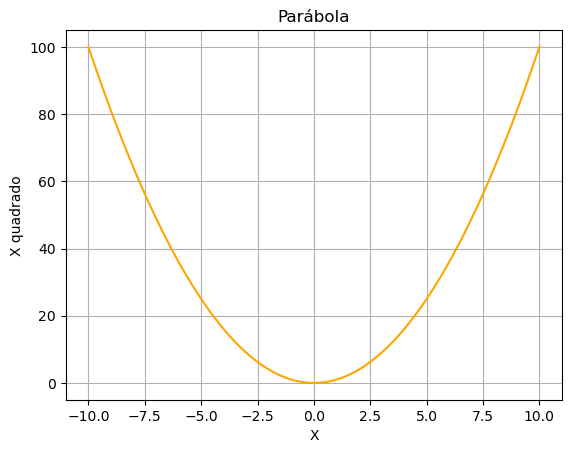

In [34]:
plt.plot(df_xquadrado["X"], df_xquadrado["Y"], "orange")
plt.xlabel("X")
plt.ylabel("X quadrado")
plt.title("Parábola")
plt.grid(); # Ponto e virgula para tirar o comentário da linha

## 1. OOP - O jeito certo

Com oop será possível uma customização ainda maior, localizando gráficos, legendas, eixos em uma figura/canvas criado

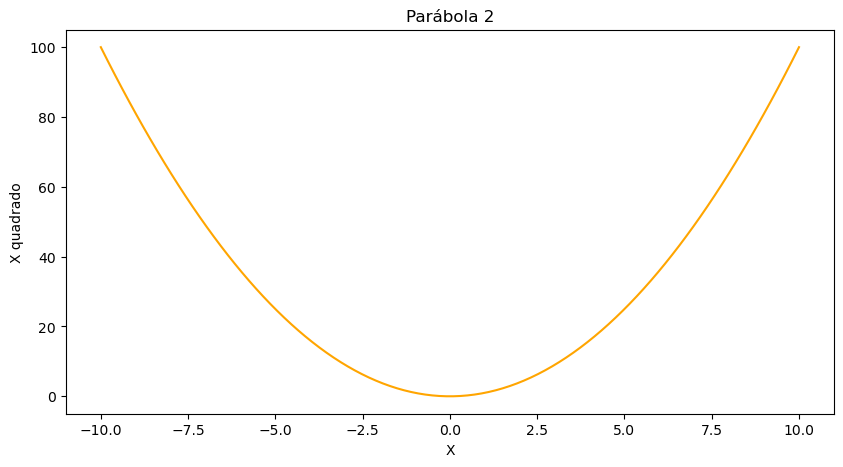

In [35]:
# Criando a figura
fig = plt.figure()

# Adicionar um eixo a figura
axes = fig.add_axes(
    [
        0, # Posição x do canto inferior direito do gráfico referente a figura
        0, # Posição y do canto inferior direito do gráfico referente a figura
        1.2, # Comprimento do gráfico
        .8, # Altura do gráfico
    ]
)

axes.plot(df_xquadrado["X"], df_xquadrado["Y"], "orange")
axes.set_xlabel("X")
axes.set_ylabel("X quadrado")
axes.set_title("Parábola 2");

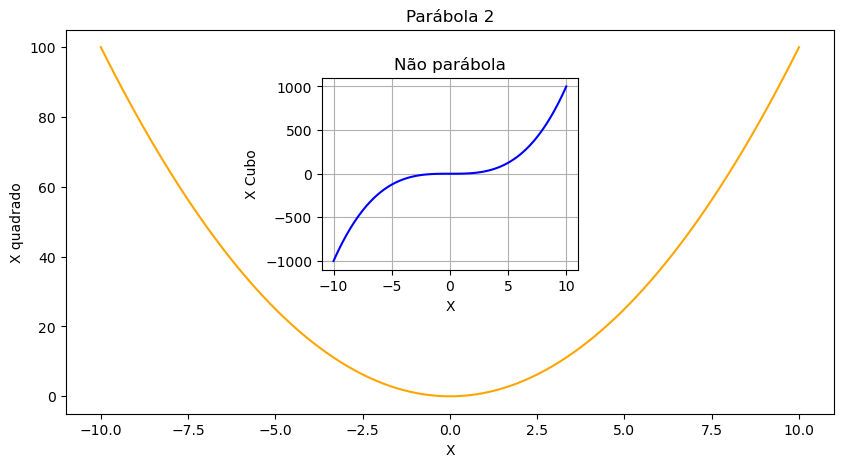

In [47]:
# Criando a figura
fig = plt.figure()

# Adicionar um eixo a figura
axes1 = fig.add_axes(
    [
        0, # Posição x do canto inferior direito do gráfico referente a figura
        0, # Posição y do canto inferior direito do gráfico referente a figura
        1.2, # Comprimento do gráfico
        .8, # Altura do gráfico
    ]
)

axes2 = fig.add_axes([0.4, 0.3, .4, .4,])

axes1.plot(df_xquadrado["X"], df_xquadrado["Y"], "orange")
axes1.set_xlabel("X")
axes1.set_ylabel("X quadrado")
axes1.set_title("Parábola 2");

axes2.plot(df_xcubo["X"], df_xcubo["Y"], "blue")
axes2.set_xlabel("X")
axes2.set_ylabel("X Cubo")
axes2.grid()
axes2.set_title("Não parábola");

## 2. Subplots

O método subplots() demonstra-se útil para a organização de múltiplos plots

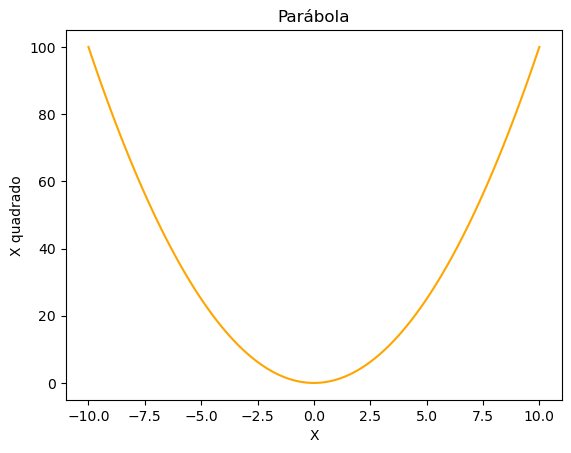

In [51]:
# similar ao plt.figure() porém já retorna fig e eixo

fig, axes = plt.subplots()

axes.plot(df_xquadrado["X"], df_xquadrado["Y"], "orange")
axes.set_xlabel("X")
axes.set_ylabel("X quadrado")
axes.set_title("Parábola");

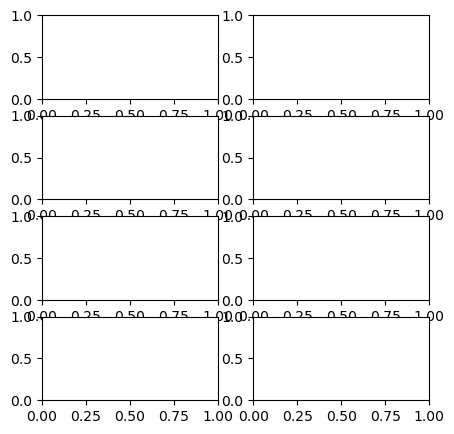

In [56]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(5, 5) # tamanho do conjunto
)

In [58]:
axes # Axes é um vetor dos eixos referentes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

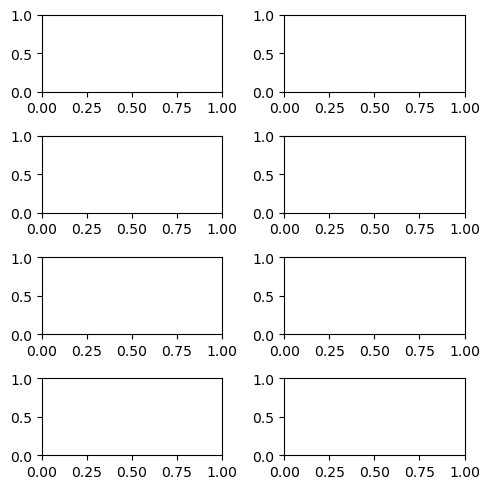

In [57]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(5, 5) # tamanho do conjunto
)

fig.tight_layout() # Remover o overlap que existia antes

In [65]:
[df_xquadrado, df_xcubo][np.random.choice([0, 1])]

,X,Y
0,-10.000000,-1000.000000
1,-9.797980,-940.610059
2,-9.595960,-883.619379
3,-9.393939,-828.978490
4,-9.191919,-776.637923
...,...,...
95,9.191919,776.637923
96,9.393939,828.978490
97,9.595960,883.619379
98,9.797980,940.610059


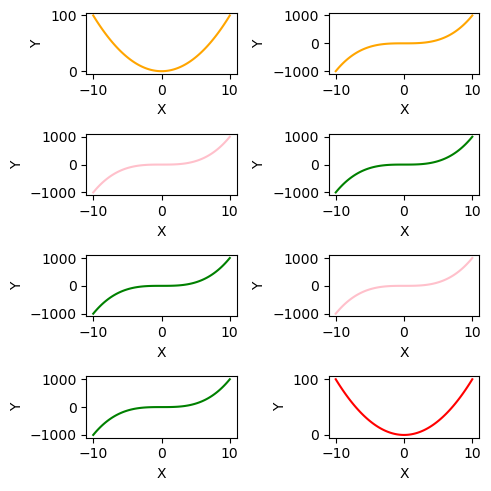

In [82]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(5, 5),
    dpi = 100 # "Qualidade/Resolução" da imagem. Significa "Dots Per Inches"
)

for row in axes:
    for ax in row:
        df_aleatorio = [df_xquadrado, df_xcubo][np.random.choice([0, 1])]
        cor_aleatoria = np.random.choice(["blue", "red", "green", "orange", "purple", "pink"])
        ax.plot(df_aleatorio["X"], df_aleatorio["Y"], cor_aleatoria)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

fig.tight_layout() # Remover o overlap que existia antes

# 3. Legenda

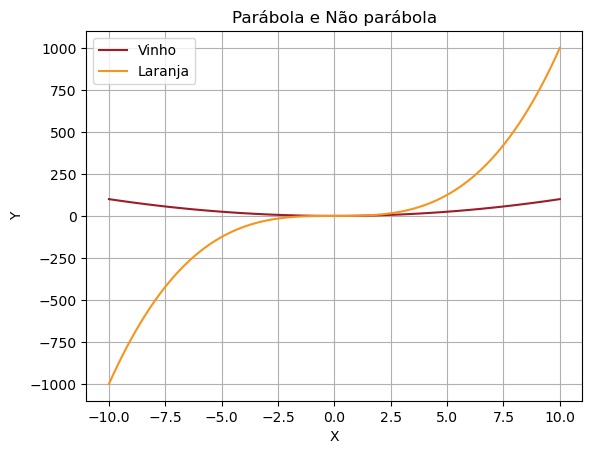

In [93]:
fig, axes = plt.subplots()

laranjilos = "#f7941e"
vinhilos = "#9a1d28"


axes.plot(df_xquadrado["X"], df_xquadrado["Y"], color=vinhilos, label="Vinho")
axes.set_xlabel("X")
axes.set_ylabel("Y")
axes.set_title("Parábola e Não parábola")

axes.plot(df_xcubo["X"], df_xcubo["Y"], color=laranjilos, label="Laranja")
axes.grid()
axes.legend()


## 4. Salvando figuras

In [96]:
fig.savefig("outputs/1. Introdução.png")
fig.savefig("outputs/1. Introdução_dpi.png", dpi=300)
fig.savefig("outputs/1. Introdução_vetor.svg")